# Model Building

In [1]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
import re
import spacy
nlp = spacy.load("en_core_web_lg")
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import MultinomialNB
from xgboost import XGBClassifier
from sklearn.metrics import f1_score, confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import f1_score,precision_score,confusion_matrix,recall_score,accuracy_score

In [2]:
df = pd.read_csv("final.csv")

In [3]:
def cleanResume(resumeText):
    if pd.isnull(resumeText) or not isinstance(resumeText, str):
        return ''
    #resumeText = re.sub(r'\d+', '', resumeText)
    resumeText = re.sub('•', '',resumeText)
    resumeText = re.sub(r'\s+', ' ', resumeText).strip()
    resumeText = re.sub('http\S+\s*', ' ', resumeText)  # remove URLs
    resumeText = re.sub('RT|cc', ' ', resumeText)  # remove RT and cc
    resumeText = re.sub('#\S+', '', resumeText)  # remove hashtags
    resumeText = re.sub('@\S+', '  ', resumeText)  # remove mentions
    resumeText = re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""), ' ', resumeText)  # remove punctuations
    resumeText = re.sub(r'[^\x00-\x7f]',r' ', resumeText) 
    resumeText = re.sub('\s+', ' ', resumeText)  # remove extra whitespace
    return resumeText
    
df['Text'] = df.Text.apply(lambda x: cleanResume(x))
#df['experience'] = df.experience.apply(lambda x: cleanResume(x))
#df["skills"] = df.skills.apply(lambda x:cleanResume(x))

In [4]:
def cleanspacy(text):
    doc = nlp(text)
    
    filtered_tokens = []
    for token in doc:
        if token.is_stop or token.is_punct:
            continue
        filtered_tokens.append(token.lemma_)
        
    return " ".join(filtered_tokens)

In [6]:
df["cleantext"] = df.Text.apply(lambda x:cleanspacy(x))

In [7]:
df1 = df[["cleantext","Resume"]]

In [8]:
df1

,cleantext,Resume
0,Anubhav Kumar Singh work globally competitive ...,peoplesoft
1,profile summary 7 year experience implement up...,peoplesoft
2,PeopleSoft Database Administrator Gangareddy p...,peoplesoft
3,Murali experience summary 6 year experience wo...,peoplesoft
4,Priyanka Ramadoss 61 46 MountPleasant Coonoor ...,peoplesoft
...,...,...
74,Workday Integration consultant Sri Krishna S P...,workday
75,seek suitable position Workday HCM Techno func...,workday
76,WORKDAY HCM FCM Kumar S S role workday consult...,workday
77,Venkateswarlu B workday consultant have 5 3 ye...,workday


In [9]:
text4 = df1["cleantext"][50]

# Label Encoding

In [10]:
lb = LabelEncoder()
df1["Resume"] = lb.fit_transform(df1["Resume"])
df1

C:\Users\abc\AppData\Local\Temp\ipykernel_10176\451299911.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["Resume"] = lb.fit_transform(df1["Resume"])


,cleantext,Resume
0,Anubhav Kumar Singh work globally competitive ...,0
1,profile summary 7 year experience implement up...,0
2,PeopleSoft Database Administrator Gangareddy p...,0
3,Murali experience summary 6 year experience wo...,0
4,Priyanka Ramadoss 61 46 MountPleasant Coonoor ...,0
...,...,...
74,Workday Integration consultant Sri Krishna S P...,3
75,seek suitable position Workday HCM Techno func...,3
76,WORKDAY HCM FCM Kumar S S role workday consult...,3
77,Venkateswarlu B workday consultant have 5 3 ye...,3


In [11]:
text = df1["cleantext"]
Target = df1["Resume"].values

In [12]:
word_vectorizer = TfidfVectorizer()
#word_vectorizer.fit(text)
#WordFeatures= word_vectorizer.transform(text)
X = word_vectorizer.fit_transform(df1["cleantext"])

In [52]:
Target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3])

In [14]:
x_train,x_test,y_train,y_test= train_test_split(X, Target,test_size=0.3, random_state=42)

In [15]:
print(x_train.shape)
print(x_test.shape)

(55, 3757)
(24, 3757)


# 1.Logistic Regression

In [16]:
lg = LogisticRegression()
lg.fit(x_train,y_train)
y_pred_lg = lg.predict(x_test)
accuracy_lg =round(accuracy_score(y_test,y_pred_lg),4)
print("Accuracy og Model: ",accuracy_lg)
print("-------------------------------------------")
print("Classification report: \n",classification_report(y_test,y_pred_lg))
print("-------------------------------------------")
print("confusion matrix: \n",confusion_matrix(y_test,y_pred_lg))

Accuracy og Model:  0.9583
-------------------------------------------
Classification report: 
               precision    recall  f1-score   support

           0       1.00      0.86      0.92         7
           1       0.88      1.00      0.93         7
           2       1.00      1.00      1.00         4
           3       1.00      1.00      1.00         6

    accuracy                           0.96        24
   macro avg       0.97      0.96      0.96        24
weighted avg       0.96      0.96      0.96        24

-------------------------------------------
confusion matrix: 
 [[6 1 0 0]
 [0 7 0 0]
 [0 0 4 0]
 [0 0 0 6]]


In [17]:
precision_lg = round(precision_score(y_test,y_pred_lg,average = 'macro'),4)
recall_lg = round(recall_score(y_test,y_pred_lg, average = 'macro'),4)
f1_lg = round(f1_score(y_test,y_pred_lg, average = 'macro'),4)

# 2. k-nearest neighbors

In [18]:
knn = KNeighborsClassifier()
knn.fit(x_train,y_train)
y_pred_knn = knn.predict(x_test)
accuracy_knn =round(accuracy_score(y_test,y_pred_knn),4)
print("Accuracy og Model: ",accuracy_knn)
print("-------------------------------------------")
print("Classification report: \n",classification_report(y_test,y_pred_knn))
print("-------------------------------------------")
print("confusion matrix: \n",confusion_matrix(y_test,y_pred_knn))

Accuracy og Model:  0.9583
-------------------------------------------
Classification report: 
               precision    recall  f1-score   support

           0       1.00      0.86      0.92         7
           1       1.00      1.00      1.00         7
           2       1.00      1.00      1.00         4
           3       0.86      1.00      0.92         6

    accuracy                           0.96        24
   macro avg       0.96      0.96      0.96        24
weighted avg       0.96      0.96      0.96        24

-------------------------------------------
confusion matrix: 
 [[6 0 0 1]
 [0 7 0 0]
 [0 0 4 0]
 [0 0 0 6]]


In [19]:
# Hyperparameter tuning for knn

In [20]:
trainac = []
testac = []

for i in range(1,25):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    trainac.append(knn.score(x_train,y_train))
    testac.append(knn.score(x_test,y_test))

In [21]:
import matplotlib.pyplot as plt

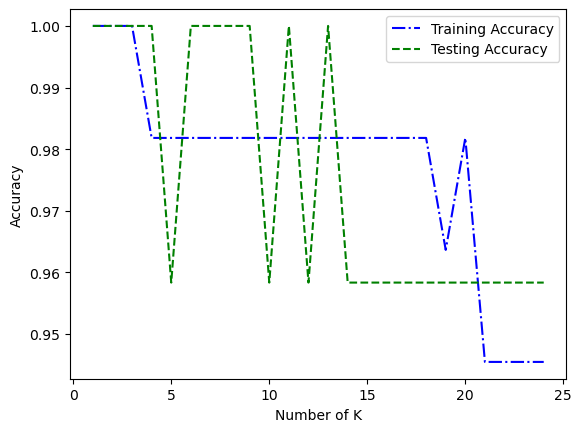

In [22]:
plt.plot(range(1,25), trainac,linestyle = '-.', color = 'blue',label = 'Training Accuracy')
plt.plot(range(1,25),testac, linestyle = '--', color = 'green', label = 'Testing Accuracy')
plt.xlabel('Number of K')
plt.ylabel('Accuracy')
#plt.vlines(x=5,linestyles=':',colors='black',ymin=0.70,ymax=0.90)
plt.legend()

In [23]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train,y_train)
y_pred_knn = knn.predict(x_test)
accuracy_knn =round(accuracy_score(y_test,y_pred_knn),4)
print("Accuracy og Model: ",accuracy_knn)
print("-------------------------------------------")
print("Classification report: \n",classification_report(y_test,y_pred_knn))
print("-------------------------------------------")
print("confusion matrix: \n",confusion_matrix(y_test,y_pred_knn))

Accuracy og Model:  1.0
-------------------------------------------
Classification report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       1.00      1.00      1.00         7
           2       1.00      1.00      1.00         4
           3       1.00      1.00      1.00         6

    accuracy                           1.00        24
   macro avg       1.00      1.00      1.00        24
weighted avg       1.00      1.00      1.00        24

-------------------------------------------
confusion matrix: 
 [[7 0 0 0]
 [0 7 0 0]
 [0 0 4 0]
 [0 0 0 6]]


In [24]:
precision_knn = round(precision_score(y_test,y_pred_knn,average = 'macro'),4)
recall_knn = round(recall_score(y_test,y_pred_knn, average = 'macro'),4)
f1_knn = round(f1_score(y_test,y_pred_knn, average = 'macro'),4)

# 3. Svm

In [25]:
svm = SVC()
svm.fit(x_train,y_train)
y_pred_svm = svm.predict(x_test)
accuracy_svm =round(accuracy_score(y_test,y_pred_svm),4)
print("Accuracy of Model: ",accuracy_svm)
print("-------------------------------------------")
print("Classification report: \n",classification_report(y_test,y_pred_svm))
print("-------------------------------------------")
print("confusion matrix: \n",confusion_matrix(y_test,y_pred_svm))

Accuracy of Model:  0.9583
-------------------------------------------
Classification report: 
               precision    recall  f1-score   support

           0       1.00      0.86      0.92         7
           1       0.88      1.00      0.93         7
           2       1.00      1.00      1.00         4
           3       1.00      1.00      1.00         6

    accuracy                           0.96        24
   macro avg       0.97      0.96      0.96        24
weighted avg       0.96      0.96      0.96        24

-------------------------------------------
confusion matrix: 
 [[6 1 0 0]
 [0 7 0 0]
 [0 0 4 0]
 [0 0 0 6]]


In [26]:
# Hyperparameter tuning for Svm

In [27]:
params = {
    'kernel' : ['poly','rbf','linear','sigmoid'],
    'C' : [0.1,0.001,0.0001,1,10],
    'gamma' : [0.1,0.001,1,10]
}

In [28]:
grid = GridSearchCV(SVC(), param_grid=params, verbose=1)

In [29]:
grid.fit(x_train,y_train)

Fitting 5 folds for each of 80 candidates, totalling 400 fits


GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 0.001, 0.0001, 1, 10],
                         'gamma': [0.1, 0.001, 1, 10],
                         'kernel': ['poly', 'rbf', 'linear', 'sigmoid']},
             verbose=1)

In [30]:
grid.best_params_

{'C': 1, 'gamma': 10, 'kernel': 'sigmoid'}

In [31]:
svm = SVC(C = 1,gamma=10, kernel= "sigmoid")
svm.fit(x_train,y_train)
y_pred_svm = svm.predict(x_test)
accuracy_svm =round(accuracy_score(y_test,y_pred_svm),4)
print("Accuracy of Model: ",accuracy_svm)
print("-------------------------------------------")
print("Classification report: \n",classification_report(y_test,y_pred_svm))
print("-------------------------------------------")
print("confusion matrix: \n",confusion_matrix(y_test,y_pred_svm))

Accuracy of Model:  0.9583
-------------------------------------------
Classification report: 
               precision    recall  f1-score   support

           0       0.88      1.00      0.93         7
           1       1.00      1.00      1.00         7
           2       1.00      1.00      1.00         4
           3       1.00      0.83      0.91         6

    accuracy                           0.96        24
   macro avg       0.97      0.96      0.96        24
weighted avg       0.96      0.96      0.96        24

-------------------------------------------
confusion matrix: 
 [[7 0 0 0]
 [0 7 0 0]
 [0 0 4 0]
 [1 0 0 5]]


In [32]:
precision_svm = round(precision_score(y_test,y_pred_svm,average = 'macro'),4)
recall_svm = round(recall_score(y_test,y_pred_svm, average = 'macro'),4)
f1_svm = round(f1_score(y_test,y_pred_svm, average = 'macro'),4)

# 4.Random Forest Classifier

In [33]:
rf = RandomForestClassifier()
rf.fit(x_train,y_train)
y_pred_rf = rf.predict(x_test)
accuracy_rf =round(accuracy_score(y_test,y_pred_rf),4)
print("Accuracy of Model: ",accuracy_rf)
print("-------------------------------------------")
print("Classification report: \n",classification_report(y_test,y_pred_rf))
print("-------------------------------------------")
print("confusion matrix: \n",confusion_matrix(y_test,y_pred_rf))

Accuracy of Model:  1.0
-------------------------------------------
Classification report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       1.00      1.00      1.00         7
           2       1.00      1.00      1.00         4
           3       1.00      1.00      1.00         6

    accuracy                           1.00        24
   macro avg       1.00      1.00      1.00        24
weighted avg       1.00      1.00      1.00        24

-------------------------------------------
confusion matrix: 
 [[7 0 0 0]
 [0 7 0 0]
 [0 0 4 0]
 [0 0 0 6]]


In [34]:
precision_rf = round(precision_score(y_test,y_pred_rf,average = 'macro'),4)
recall_rf = round(recall_score(y_test,y_pred_rf, average = 'macro'),4)
f1_rf = round(f1_score(y_test,y_pred_rf, average = 'macro'),4)

# 5. Naive-Bayes Classifier

In [35]:
nb=MultinomialNB()
nb.fit(x_train,y_train)
y_pred_nb = nb.predict(x_test)
accuracy_nb =round(accuracy_score(y_test,y_pred_nb),4)
print("Accuracy of Model: ",accuracy_nb)
print("-------------------------------------------")
print("Classification report: \n",classification_report(y_test,y_pred_nb))
print("-------------------------------------------")
print("confusion matrix: \n",confusion_matrix(y_test,y_pred_nb))

Accuracy of Model:  0.9583
-------------------------------------------
Classification report: 
               precision    recall  f1-score   support

           0       1.00      0.86      0.92         7
           1       1.00      1.00      1.00         7
           2       1.00      1.00      1.00         4
           3       0.86      1.00      0.92         6

    accuracy                           0.96        24
   macro avg       0.96      0.96      0.96        24
weighted avg       0.96      0.96      0.96        24

-------------------------------------------
confusion matrix: 
 [[6 0 0 1]
 [0 7 0 0]
 [0 0 4 0]
 [0 0 0 6]]


In [36]:
precision_nb = round(precision_score(y_test,y_pred_nb,average = 'macro'),4)
recall_nb = round(recall_score(y_test,y_pred_nb, average = 'macro'),4)
f1_nb = round(f1_score(y_test,y_pred_nb, average = 'macro'),4)

# 6.Decision Tree Classifier

In [37]:
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)
y_pred_dt = dt.predict(x_test)
accuracy_dt =round(accuracy_score(y_test,y_pred_dt),4)
print("Accuracy of Model: ",accuracy_dt)
print("-------------------------------------------")
print("Classification report: \n",classification_report(y_test,y_pred_dt))
print("-------------------------------------------")
print("confusion matrix: \n",confusion_matrix(y_test,y_pred_dt))

Accuracy of Model:  1.0
-------------------------------------------
Classification report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       1.00      1.00      1.00         7
           2       1.00      1.00      1.00         4
           3       1.00      1.00      1.00         6

    accuracy                           1.00        24
   macro avg       1.00      1.00      1.00        24
weighted avg       1.00      1.00      1.00        24

-------------------------------------------
confusion matrix: 
 [[7 0 0 0]
 [0 7 0 0]
 [0 0 4 0]
 [0 0 0 6]]


In [38]:
precision_dt = round(precision_score(y_test,y_pred_dt,average = 'macro'),4)
recall_dt = round(recall_score(y_test,y_pred_dt, average = 'macro'),4)
f1_dt = round(f1_score(y_test,y_pred_dt, average = 'macro'),4)

# 7.AdaBoost

In [39]:
ab = AdaBoostClassifier()
ab.fit(x_train,y_train)
y_pred_ab = ab.predict(x_test)
accuracy_ab =round(accuracy_score(y_test,y_pred_ab),4)
print("Accuracy of Model: ",accuracy_ab)
print("-------------------------------------------")
print("Classification report: \n",classification_report(y_test,y_pred_ab))
print("-------------------------------------------")
print("confusion matrix: \n",confusion_matrix(y_test,y_pred_ab))

Accuracy of Model:  0.7917
-------------------------------------------
Classification report: 
               precision    recall  f1-score   support

           0       0.88      1.00      0.93         7
           1       0.64      1.00      0.78         7
           2       0.00      0.00      0.00         4
           3       1.00      0.83      0.91         6

    accuracy                           0.79        24
   macro avg       0.63      0.71      0.66        24
weighted avg       0.69      0.79      0.73        24

-------------------------------------------
confusion matrix: 
 [[7 0 0 0]
 [0 7 0 0]
 [0 4 0 0]
 [1 0 0 5]]


C:\Users\abc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\abc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\abc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [40]:
precision_ab = round(precision_score(y_test,y_pred_ab,average = 'macro'),4)
recall_ab = round(recall_score(y_test,y_pred_ab, average = 'macro'),4)
f1_ab = round(f1_score(y_test,y_pred_ab, average = 'macro'),4)

C:\Users\abc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# 8.GradientBoosting Classifier

In [41]:
gb = GradientBoostingClassifier()
gb.fit(x_train,y_train)
y_pred_gb = gb.predict(x_test)
accuracy_gb =round(accuracy_score(y_test,y_pred_gb),4)
print("Accuracy of Model: ",accuracy_gb)
print("-------------------------------------------")
print("Classification report: \n",classification_report(y_test,y_pred_gb))
print("-------------------------------------------")
print("confusion matrix: \n",confusion_matrix(y_test,y_pred_gb))

Accuracy of Model:  0.875
-------------------------------------------
Classification report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       0.75      0.86      0.80         7
           2       0.67      0.50      0.57         4
           3       1.00      1.00      1.00         6

    accuracy                           0.88        24
   macro avg       0.85      0.84      0.84        24
weighted avg       0.87      0.88      0.87        24

-------------------------------------------
confusion matrix: 
 [[7 0 0 0]
 [0 6 1 0]
 [0 2 2 0]
 [0 0 0 6]]


In [42]:
precision_gb = round(precision_score(y_test,y_pred_gb,average = 'macro'),4)
recall_gb = round(recall_score(y_test,y_pred_gb, average = 'macro'),4)
f1_gb = round(f1_score(y_test,y_pred_gb, average = 'macro'),4)

# 9.XGBoost Classifier

In [43]:
xg = XGBClassifier()
xg.fit(x_train,y_train)
y_pred_xg = xg.predict(x_test)
accuracy_xg =round(accuracy_score(y_test,y_pred_xg),4)
print("Accuracy of Model: ",accuracy_xg)
print("-------------------------------------------")
print("Classification report: \n",classification_report(y_test,y_pred_xg))
print("-------------------------------------------")
print("confusion matrix: \n",confusion_matrix(y_test,y_pred_xg))

Accuracy of Model:  0.9167
-------------------------------------------
Classification report: 
               precision    recall  f1-score   support

           0       0.88      1.00      0.93         7
           1       1.00      0.86      0.92         7
           2       0.80      1.00      0.89         4
           3       1.00      0.83      0.91         6

    accuracy                           0.92        24
   macro avg       0.92      0.92      0.91        24
weighted avg       0.93      0.92      0.92        24

-------------------------------------------
confusion matrix: 
 [[7 0 0 0]
 [0 6 1 0]
 [0 0 4 0]
 [1 0 0 5]]


In [44]:
precision_xg = round(precision_score(y_test,y_pred_xg,average = 'macro'),4)
recall_xg = round(recall_score(y_test,y_pred_xg, average = 'macro'),4)
f1_xg = round(f1_score(y_test,y_pred_xg, average = 'macro'),4)

In [45]:
table = {'Classifier' : ['Logistic Regression','SVM Classifier','Random Forest Classifier', 'Naive-Bayes Classifier','Decision Tree Classifier','AdaBoost Classifier', 'Gradient Boosting Classifier', 'k-nearest neighbors',"XGBoost Classifier"], 
         'Accuracy' : [accuracy_lg, accuracy_svm, accuracy_rf, accuracy_nb, accuracy_dt, accuracy_ab, accuracy_gb, accuracy_knn,accuracy_xg],
         'Precision Score' : [precision_lg, precision_svm, precision_rf, precision_nb, precision_dt, precision_ab, precision_gb, precision_knn,precision_xg], 
         'Recall Score' : [recall_lg, recall_svm, recall_rf, recall_nb, recall_dt, recall_ab, recall_gb, recall_knn,recall_xg], 
         'F1_Score' : [f1_lg, f1_svm, f1_rf, f1_nb, f1_dt, f1_ab, f1_gb, f1_knn,f1_xg]}
table = pd.DataFrame(table)

In [46]:
table.sort_values(["Accuracy"],ascending=False)

,Classifier,Accuracy,Precision Score,Recall Score,F1_Score
2,Random Forest Classifier,1.0000,1.0000,1.0000,1.0000
4,Decision Tree Classifier,1.0000,1.0000,1.0000,1.0000
7,k-nearest neighbors,1.0000,1.0000,1.0000,1.0000
0,Logistic Regression,0.9583,0.9688,0.9643,0.9641
1,SVM Classifier,0.9583,0.9688,0.9583,0.9606
3,Naive-Bayes Classifier,0.9583,0.9643,0.9643,0.9615
8,XGBoost Classifier,0.9167,0.9188,0.9226,0.9136
6,Gradient Boosting Classifier,0.8750,0.8542,0.8393,0.8429
5,AdaBoost Classifier,0.7917,0.6278,0.7083,0.6551


In [47]:
import pickle

In [48]:
pickle_out = open("Resume1.pkl",mode = 'wb')
pickle.dump(rf,pickle_out)
pickle_out.close()

In [94]:
from IPython import display
display.FileLink('Resume.pkl')

C:\Users\abc\Desktop\Project2 Resume Classification\Resume.pkl

In [51]:
pickle_out = open("Tdfi1.pkl",mode = 'wb')
pickle.dump(word_vectorizer,pickle_out)
pickle_out.close()